In [1]:
from manim import *
import numpy as np
from scipy import signal

In [3]:
computer = SVGMobject(
    "./figures/computer.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
product_calc = SVGMobject(
    "./figures/product_calc.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
bp_filter = SVGMobject(
    "./figures/filter.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
window_function = SVGMobject(
    "./figures/window_function.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
adc = SVGMobject(
    "./figures/adc.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
range_norm = SVGMobject(
    "./figures/range_norm.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)

In [6]:
blocks = [adc, window_function, bp_filter, range_norm, product_calc, computer]
coords = np.array(
    [
block.get_right()
        for block in blocks
    ]
)
coords[:2]

array([[[-1.32111473,  0.        ,  0.        ],
        [ 1.32111473,  0.        ,  0.        ],
        [ 3.82111473,  0.        ,  0.        ]],

       [[-1.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 3.5       ,  0.        ,  0.        ]]])

In [16]:
coords[:, 1].cumsum(axis=0)  # + RIGHT * 2.5

array([[1.32111473, 0.        , 0.        ],
       [2.32111473, 0.        , 0.        ],
       [3.32111473, 0.        , 0.        ],
       [4.32111473, 0.        , 0.        ],
       [5.32111473, 0.        , 0.        ],
       [6.2924689 , 0.        , 0.        ]])

In [2]:
import matplotlib.pyplot as plt

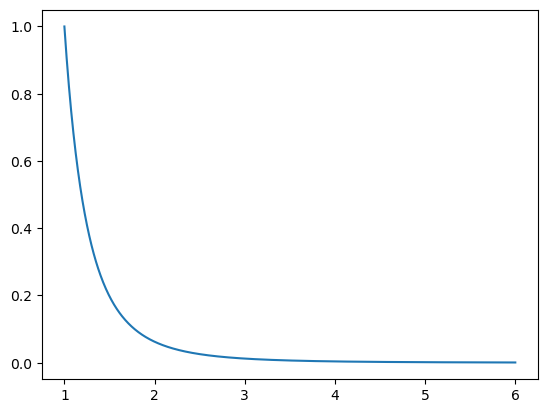

In [8]:
R = np.linspace(1, 6, 1000)
plt.plot(R, 1 / (R**4))

In [10]:
f_A = 16
f_0 = 2
A = 1

triangular_f_eqn = (
    lambda t: f_A * (signal.sawtooth(2 * PI * t, width=0.5) + 1) / 2 + f_0
)
triangular_amp_eqn = lambda t: A * np.sin(2 * PI * triangular_f_eqn(t) * t)

In [11]:
x_max = 1
x_len = 11
y_len = 2.5
step = 0.001

t = np.arange(0, x_max, step=0.001)
f = f_A * (signal.sawtooth(2 * PI * t, width=0.5) + 1) / 2 + f_0
a = A * np.sin(2 * PI * triangular_f_eqn(t) * t)
a2 = A * np.sin(2 * PI * f)  # * t)

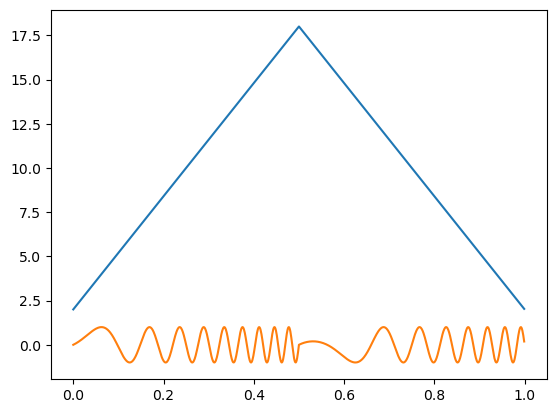

In [19]:
plt.plot(t, f)
plt.plot(t, a)

In [22]:
f[::20]

array([ 2.  ,  2.64,  3.28,  3.92,  4.56,  5.2 ,  5.84,  6.48,  7.12,
        7.76,  8.4 ,  9.04,  9.68, 10.32, 10.96, 11.6 , 12.24, 12.88,
       13.52, 14.16, 14.8 , 15.44, 16.08, 16.72, 17.36, 18.  , 17.36,
       16.72, 16.08, 15.44, 14.8 , 14.16, 13.52, 12.88, 12.24, 11.6 ,
       10.96, 10.32,  9.68,  9.04,  8.4 ,  7.76,  7.12,  6.48,  5.84,
        5.2 ,  4.56,  3.92,  3.28,  2.64])

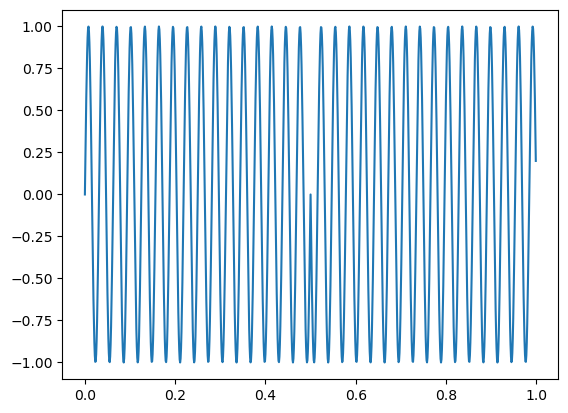

In [13]:
plt.plot(t, a2)

In [14]:
f.size // 2

500

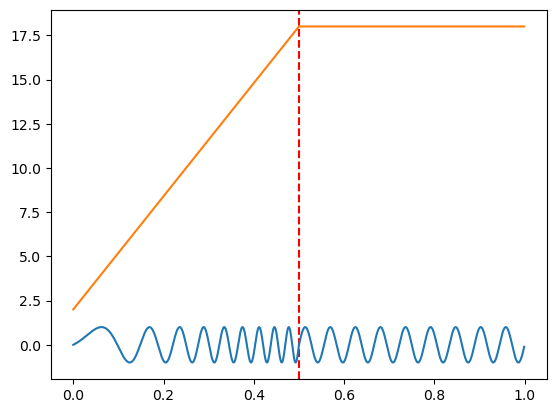

In [32]:
a3 = A * np.sin(
    2
    * PI
    * (
        np.concatenate(
            (
                f[: f.size // 2],
                np.ones(500) * 18,
                # f[f.size // 2 :][::-1],
            ),
            # (
            #     f[: f.size // 2],
            #     f[f.size // 2 :][::-1],
            # ),
            axis=None,
        )
    )
    * t
)
plt.axvline(x=0.5, c="r", linestyle="--")
plt.plot(t, a3)
plt.plot(
    t,
    np.concatenate(
        (
            f[: f.size // 2],
            np.ones(500) * 18,
        ),
        axis=None,
    ),
)

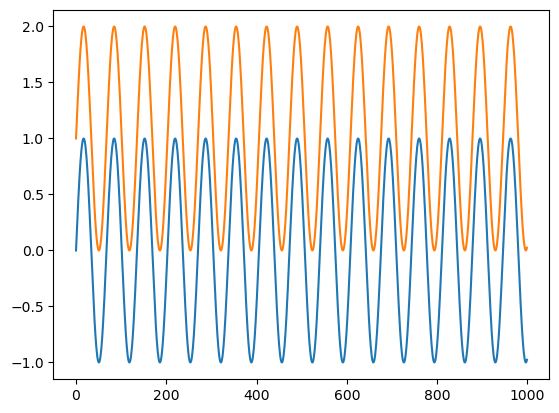

In [31]:
plt.plot(A * np.sin(2 * PI * triangular_f_eqn(0.4) * t))
plt.plot(A * np.sin(2 * PI * triangular_f_eqn(0.6) * t) + 1)

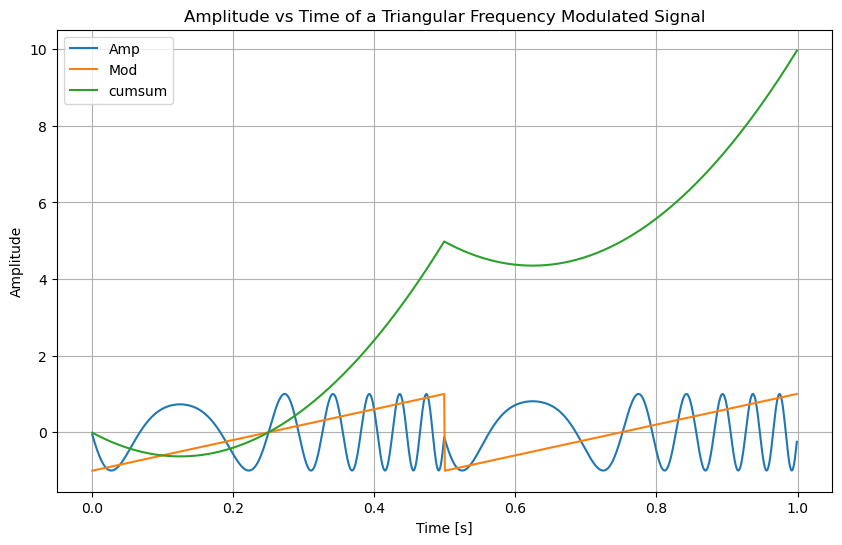

In [17]:
from scipy import signal

# Parameters
carrier_freq = 10  # Carrier frequency in Hz
modulation_freq = 0.5  # Modulation frequency in Hz
modulation_index = 20  # Modulation index
duration = 1  # Duration of the signal in seconds
sampling_rate = 1000  # Samples per second

# Time array
t = np.arange(0, duration, 1 / sampling_rate)

# Triangular wave for frequency modulation
modulating_signal = modulation_index * np.arcsin(
    np.sin(2 * np.pi * modulation_freq * t)
)
modulating_signal = modulation_index * signal.sawtooth(2 * np.pi * 2 * t)

# Frequency modulation
instantaneous_frequency = carrier_freq + modulating_signal

# Instantiate the FM signal using the instantaneous frequency
signal = np.sin(2 * np.pi * np.cumsum(instantaneous_frequency) / sampling_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Amp")
plt.plot(t, modulating_signal / modulating_signal.max(), label="Mod")
plt.plot(t, np.cumsum(instantaneous_frequency) / sampling_rate, label="cumsum")
plt.title("Amplitude vs Time of a Triangular Frequency Modulated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

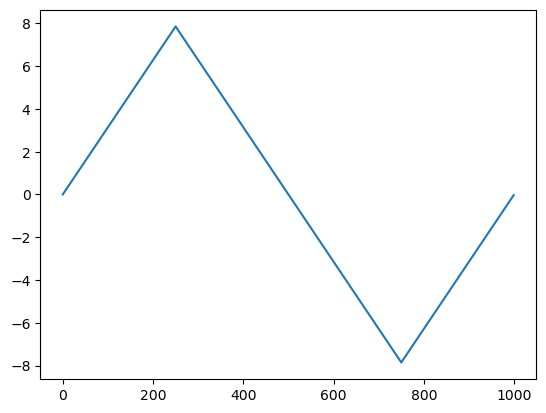

In [36]:
plt.plot(modulating_signal)

In [46]:
from scipy import signal

triangular_f_eqn = (
    lambda t: f_A * (signal.sawtooth(2 * PI * t, width=0.5) + 1) / 2 + f_0
)

In [48]:
triangular_f_eqn(np.linspace(0, 1, 1000)).sum()

9991.991991991992

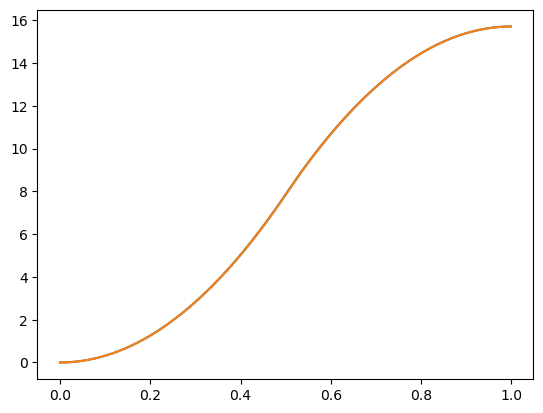

In [64]:
fs = 1000
t = np.arange(0, 1, 1 / fs)

modulating_signal_lambda = lambda t: modulation_index * np.arcsin(
    np.sin(2 * np.pi * modulation_freq * t)
)
plt.plot(t, np.cumsum(modulating_signal_lambda(t)) / fs)

values = []
for temp_t in t:
    values.append(np.sum(modulating_signal_lambda(np.arange(0, temp_t, 1 / fs))) / fs)

plt.plot(t, values)


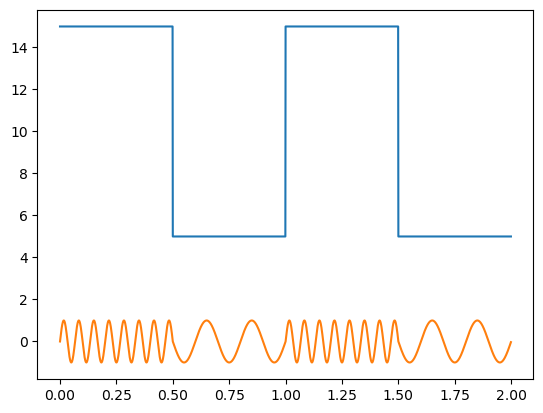

In [8]:
carrier_freq = 10
modulation_index = 5
fs = 1000
t = np.arange(0, 2, 1 / fs)
sq = modulation_index * signal.square(2 * PI * t) + carrier_freq
amp = np.sin(2 * PI * sq * t)

plt.plot(t, sq)
plt.plot(t, amp)